### Exercise 1

#### 1. Describe the steps required for performing PCA. How SVD can be used within this process?

The Principal Component Analysis is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional representation, by means of linear combinations of vectors that are directed in the directions where variance is maximized, in descending order: this means that the vector related to the first principal component is the direction of maximum variance in the dataset, the vector related to the second principal component is the second direction where variance is maximized, and so on.

Here are the steps required to perform PCA:
- Center (or standardize) the data: move to a dataset where each feature has zero mean (and unit variance if standardized);
- Compute the covariance matrix of the centered (standardized) data: $$ C = \frac{A^TA}{n-1}$$ with $n$ number of samples;
- Find eigenvectors and eigenvalues of the covariance matrix: $C$ is symmetric, so it can be diagonalized $$C = WLW^T$$ Eigenvectors are in matrix $W$ and represent the principal components (direction of maximum variance), and the eigenvalues are in the diagonal matrix $L$ and indicate the amount of variance explained by each principal component (the magnitude of the variance). 

    Eigenvectors are all orthogonal to each other, and the corresponding eigenvalues are sorted in descending order;
- Project the data onto the new feature space: principal components for the data are given by $AV$. 

    The new features will be a linear combination of the original features. The projection matrix is obtained by stacking the eigenvectores corresponding to the selected principal components (i.e., the ones that together explain the majority of the variance in the dataset). The new dataset is obtained by multiplying the standardized data by the projection matrix.

The SVD can be used in this process by modifying a little bit the steps:
- Instead of computing the covariance matrix of the centered (standardized) data, apply the SVD decomposition on it: $$A = U\Sigma V^T$$
 Matrix $U$ contains the left singular vectors, matrix $V^T$ contains the right singular vectors, while matrix $\Sigma$ is diagonal and contains the singular values.
 We can easily see that $$C = \frac{V\Sigma U^TU\Sigma V^T}{n-1} = V\frac{\Sigma ^2}{n-1}V^T$$ so right singular vectors $V$ are principal components and singular values are related to eigenvalues of the covariance matrix by $\lambda _i = \frac{\sigma _i ^2}{n-1} $ .
- Principal components are then obtained by multiplying $AV = U\Sigma V^TV = U\Sigma$

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Observe matrix containing dataset to understand which are the features and samples: how they are disposed
np.random.seed(0)
A = np.random.randn(4,10) * 5
print('%d features' % A.shape[0])
print('%d samples'  % A.shape[1])
A
pd.DataFrame(A)

4 features
10 samples


,0,1,2,3,4,5,6,7,8,9
0,8.820262,2.000786,4.893690,11.204466,9.337790,-4.886389,4.750442,-0.756786,-0.516094,2.052993
1,0.720218,7.271368,3.805189,0.608375,2.219316,1.668372,7.470395,-1.025791,1.565339,-4.270479
2,-12.764949,3.268093,4.322181,-3.710825,11.348773,-7.271828,0.228793,-0.935919,7.663896,7.346794
3,0.774737,1.890813,-4.438929,-9.903982,-1.739561,0.781745,6.151453,6.011899,-1.936634,-1.511514


In [4]:
# NORMALIZE IT 
np.mean(A, axis=1) # computes the mean of each row and put in an array with length equal to the number of rows

array([ 3.69011585,  2.00323008,  0.94950078, -0.39199724])

In [5]:
A - np.mean(A, axis=1)[:, None]

array([[  5.13014588,  -1.68932981,   1.20357407,   7.51435014,
          5.6476741 ,  -8.57650525,   1.06032623,  -4.4469019 ,
         -4.20621011,  -1.63712334],
       [ -1.28301222,   5.26813746,   1.80195855,  -1.39485499,
          0.21608609,  -0.33485844,   5.46716529,  -3.02902139,
         -0.43789157,  -6.27370877],
       [-13.71444986,   2.3185922 ,   3.37268021,  -4.66032588,
         10.39927234,  -8.22132915,  -0.72070819,  -1.88542003,
          6.71439529,   6.39729307],
       [  1.16673437,   2.28280984,  -4.04693149,  -9.5119851 ,
         -1.3475635 ,   1.17374209,   6.54345065,   6.40389649,
         -1.54463684,  -1.11951651]])

In [6]:
A_norm = (A - np.mean(A, axis=1)[:, None]) / np.std(A, axis=1)[:, None]

In [7]:
# Compute the SVD of the normalized matrix, this is the PCA
U, s, VT = np.linalg.svd(A_norm, full_matrices=False)

---

#### 2. Suppose you perform PCA on a 2D dataset and it yields 2 eigenvalues which are equal. 
- **What does it mean concerning the importance of the dimension?**
  - Equal eigenvalues indicate that the two principal components explain the same amount of variance.
  - There is no clear dominant direction, suggesting the dataset has **no strong intrinsic orientation**.

- **Would pursuing a dimensionality reduction be a good choice? Why?**
  - Dimensionality reduction might **not** be effective here because both dimensions contribute equally to the variance.
  - Reducing to 1D would result in a significant loss of information.

---



#### 3. Draw a dataset with two eigenvalues of the same size.
- A circular dataset (or a uniformly distributed dataset with equal spread along both axes) will yield two eigenvalues of the same size.



To draw a dataset with two eigenvalues of the same size, you need to create data that is evenly spread in all directions around a central point, such as points forming a circle or a uniformly distributed blob in a 2D space.

(100,)
(500,)
(500, 2)
[12.84523258 12.84523258]


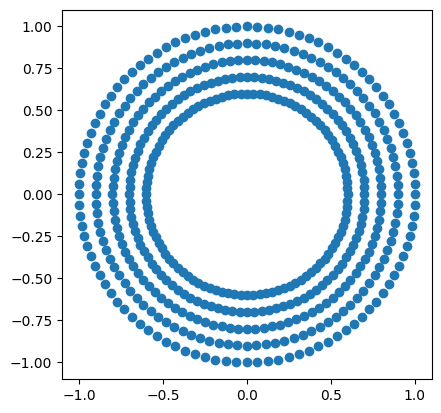

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 100 evenly spaced angles from 0 to 2*pi (a full circle)
sampling = np.arange(0, 2 * np.pi, np.pi / 50)  # Step size is pi/50
print(sampling.shape)  # Shape will be (100,)

# Generate the x and y coordinates for points on the unit circle
X = np.cos(sampling)  # x-coordinates for the unit circle
Y = np.sin(sampling)  # y-coordinates for the unit circle

# Add smaller concentric circles with progressively smaller radii
for i in range(4):  # Loop 4 times to add 4 additional circles
    # Compute the x and y coordinates for a smaller circle
    X = np.concatenate([X, np.cos(sampling) * (1 - (i + 1) / 10)])  # Scale radius
    Y = np.concatenate([Y, np.sin(sampling) * (1 - (i + 1) / 10)])  # Scale radius
print(X.shape)  # Total number of points = 100 * 5 = 500

# Combine x and y into a single 2D array, where each row is a point [x, y]
A = np.column_stack([X, Y])  # Create a 500 x 2 matrix of points
print(A.shape)  # Shape will be (500, 2)

# Perform Singular Value Decomposition (SVD) on the matrix A
_, s, _ = np.linalg.svd(A)  # Decompose A; s contains the singular values
print(s)  # Singular values represent the importance of each principal component

# Plot the points to visualize the concentric circles
plt.scatter(X, Y)  # Scatter plot of all points
plt.gca().set_aspect("equal")  # Ensure equal scaling on x and y axes for proper visualization
plt.show()  # Display the plot


A circular dataset is symmetric, meaning the spread of points is identical in all directions.
This symmetry results in equal variances along principal components, producing two eigenvalues of the same size.

Singular values: [12.84523258 12.84523258]
Principal components (rows of Vt):
 [[-1. -0.]
 [-0. -1.]]


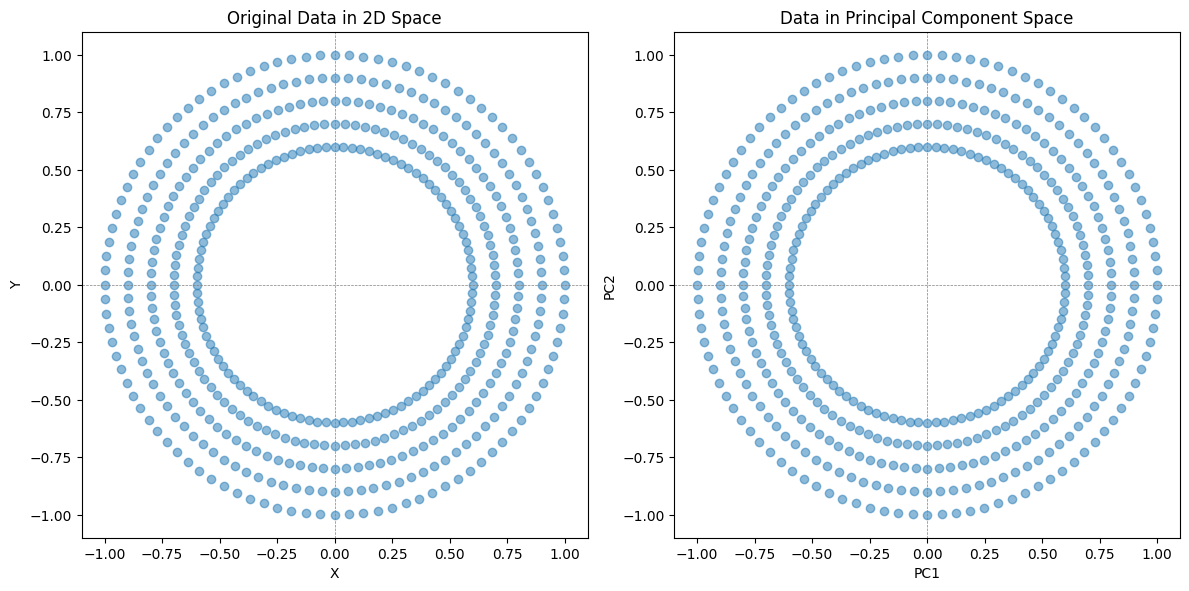

Explained variance ratio: [0.5 0.5]


In [4]:
# Perform PCA using Singular Value Decomposition
mean_A = np.mean(A, axis=0)  # Compute the mean of the data
A_centered = A - mean_A  # Center the data by subtracting the mean
# Perform SVD on the centered data
U, s, Vt = np.linalg.svd(A_centered)  # s contains the singular values, Vt rows are principal components

# Print the results
print("Singular values:", s)  # Magnitude of variance explained by each principal component
print("Principal components (rows of Vt):\n", Vt)

# Project the data onto the principal components
A_projected = A_centered @ Vt.T  # Transformed data in the principal component space

# Plot the original data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(A[:, 0], A[:, 1], alpha=0.5, label="Original Data")
plt.gca().set_aspect("equal")
plt.axhline(0, color="gray", linestyle="--", linewidth=0.5)
plt.axvline(0, color="gray", linestyle="--", linewidth=0.5)
plt.title("Original Data in 2D Space")
plt.xlabel("X")
plt.ylabel("Y")

# Plot the data in the principal component space
plt.subplot(1, 2, 2)
plt.scatter(A_projected[:, 0], A_projected[:, 1], alpha=0.5, label="PCA Transformed Data")
plt.axhline(0, color="gray", linestyle="--", linewidth=0.5)
plt.axvline(0, color="gray", linestyle="--", linewidth=0.5)
plt.title("Data in Principal Component Space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.gca().set_aspect("equal")

plt.tight_layout()
plt.show()

# Explained variance ratio
explained_variance_ratio = (s ** 2) / np.sum(s ** 2)  # Proportion of variance explained by each component
print("Explained variance ratio:", explained_variance_ratio)

---


#### 4. Suppose now you have performed a PCA on a 2D dataset and you get the eigenvalues 6 and 2.
- **Draw a distribution of sample points that may give rise to these results.**
  - A dataset with an elongated shape along one axis (e.g., a cigar-shaped cloud of points) corresponds to these eigenvalues.
- **Also draw the eigenvectors.**
  - The eigenvector corresponding to the eigenvalue 6 points along the elongated direction.
  - The eigenvector corresponding to the eigenvalue 2 is orthogonal to the first and points along the narrower direction.


[5.85383535 1.97236799]
[2.41947006 1.40441019]


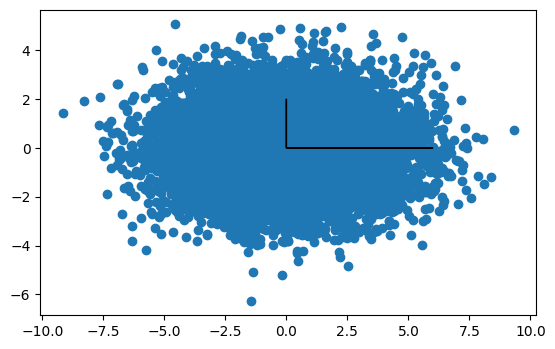

In [11]:
np.random.seed(0)
n_samples = 10000
X = np.random.normal(loc=0.0, scale=np.sqrt(6), size=(n_samples))
Y = np.random.normal(loc=0.0, scale=np.sqrt(2), size=(n_samples))
# loc: the mean of the normal distribution is 0. This centers the data around the origin
# scale = np.sqrt(value): the std is the square root of value, ensuring that the spread of data along the axis corresponds to variance of 'value'
A = np.column_stack([X, Y])

print(np.linalg.eigvals((A.T @ A) / n_samples))
_, s, _ = np.linalg.svd(A, full_matrices=False)
print(s / np.sqrt(n_samples))

plt.scatter(X, Y)
plt.arrow(0, 0, 6, 0)
plt.arrow(0, 0, 0, 2)
plt.gca().set_aspect("equal")

[[4.94117647 1.76470588]
 [1.76470588 3.05882353]]
(100000, 2)
[[5.56214818 1.2426036 ]
 [1.2426036  2.41793871]]


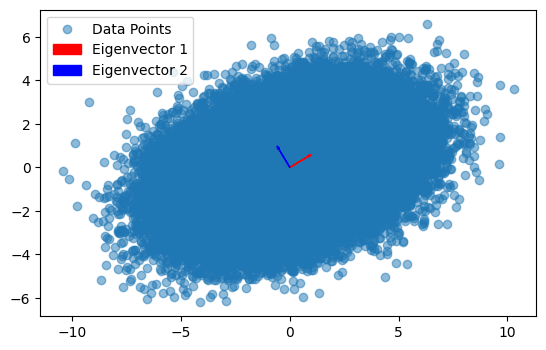

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Number of points to generate in the dataset
n_samples = 100000

# Define two eigenvectors as 2D vectors (arbitrarily chosen)
eigv1 = np.array([15, 9])  # First eigenvector (not normalized)
eigv2 = np.array([-9, 15])  # Second eigenvector (not normalized)

# Normalize the eigenvectors to make them unit vectors
eigv1 = eigv1 / np.linalg.norm(eigv1)
eigv2 = eigv2 / np.linalg.norm(eigv2)

# Define a diagonal matrix S containing the eigenvalues (variances along the principal components)
S = np.diag([6, 2])  # Variances (eigenvalues) for the principal components

# Combine eigenvectors into a matrix W, where columns represent the eigenvectors
W = np.column_stack([eigv1, eigv2])  # W is a 2x2 matrix of eigenvectors

# Compute the covariance matrix using the formula C = W * S * W.T
C = W @ S @ W.T  # Ensures covariance matrix matches specified eigenvalues and eigenvectors
print(C)  # Print the covariance matrix

# Generate samples from a multivariate normal distribution with covariance C
np.random.seed(0)  # Set a random seed for reproducibility
A = np.linalg.cholesky(C)  # Cholesky decomposition of covariance matrix
sampling_points = np.random.randn(n_samples, 2)  # Generate random samples from standard normal distribution
X = sampling_points @ A  # Transform samples to match the desired covariance structure
print(X.shape)  # X should have shape (n_samples, 2)
''' 
The Cholesky decomposition is a useful tool 
for generating correlated data that follows a specified covariance structure. 
'''
# Compute and print the covariance matrix of the generated dataset to verify correctness
cov = np.cov(X.T)  # np.cov expects features to be rows, so we transpose X
print(cov)  # Should be close to the desired covariance matrix C

# Visualize the data distribution
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label="Data Points")  # Scatterplot of the dataset
plt.arrow(0, 0, eigv1[0], eigv1[1], color='red', head_width=0.1, label="Eigenvector 1")  # Draw eigv1
plt.arrow(0, 0, eigv2[0], eigv2[1], color='blue', head_width=0.1, label="Eigenvector 2")  # Draw eigv2
plt.gca().set_aspect("equal")  # Ensure equal aspect ratio
plt.legend()
plt.show()



[774.20577646 445.66759347]
(100000, 2)


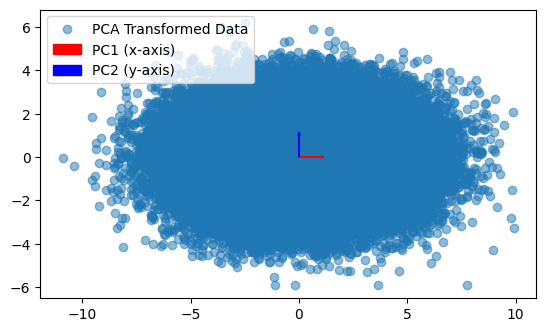

In [7]:
# Perform SVD on the dataset to perform PCA
U, s, VT = np.linalg.svd(X, full_matrices=False)  # s contains singular values (related to eigenvalues)
print(s)  # Singular values (proportional to square roots of eigenvalues)

# Transform data into PCA space
PHI = U @ np.diag(s)  # PHI is the data transformed into the PCA space
print(PHI.shape)  # PHI should have the same shape as X (n_samples, 2)

# Visualize the data in the PCA space
plt.scatter(PHI[:, 0], PHI[:, 1], alpha=0.5, label="PCA Transformed Data")  # Scatterplot of PCA-transformed data
plt.arrow(0, 0, 1, 0, color='red', head_width=0.1, label="PC1 (x-axis)")  # Draw the principal component axis (PC1)
plt.arrow(0, 0, 0, 1, color='blue', head_width=0.1, label="PC2 (y-axis)")  # Draw the second principal component axis (PC2)
plt.gca().set_aspect("equal")  # Ensure equal aspect ratio
plt.legend()
plt.show()


In [8]:

# Print the eigenvalues obtained after PCA
print("Eigenvalues obtained after having performed the PCA on the data:")
print(np.linalg.eigvals(X.T @ X) / (n_samples - 1))  # Recalculate eigenvalues of the covariance matrix
print("Which is basically the couple (6, 2) that we wanted")  # Should match the desired eigenvalues


Eigenvalues obtained after having performed the PCA on the data:
[5.99400578 1.9862159 ]
Which is basically the couple (6, 2) that we wanted


---



#### 5. Consider the following 3 data points in the 2D space: (-1, 1), (0, 0), and (1, 1).
- **What’s the first principal component of the given dataset?**
  - Compute the mean of the data:
    $$
    \text{mean} = (0, \frac{2}{3}).
    $$
  - Center the data by subtracting the mean.
  - Compute the covariance matrix and its eigenvectors.
  - The first principal component corresponds to the eigenvector of the largest eigenvalue.



Centered data
[[-1.          0.33333333]
 [ 0.         -0.66666667]
 [ 1.          0.33333333]]
Covariance matrix
[[0.66666667 0.        ]
 [0.         0.22222222]]


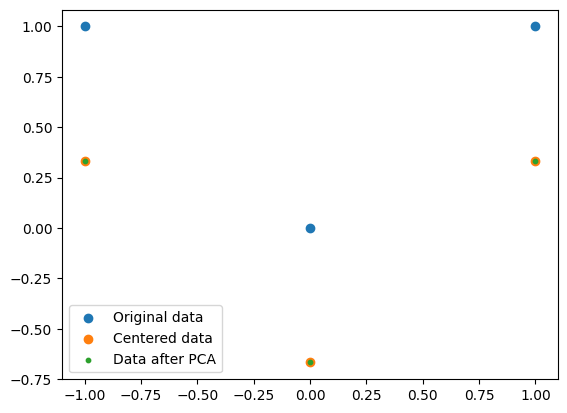

In [23]:
p1 = np.array([-1, 1])
p2 = np.array([0, 0])
p3 = np.array([1, 1])

data = np.row_stack([p1, p2, p3])

plt.scatter(data[:, 0], data[:, 1], label="Original data")

# Centralize data
data_mean = np.mean(data, axis=0)
data = data - data_mean[np.newaxis, :]
print("Centered data")
print(data)
# covariance matrix
c = data.T @ data / 3
print("Covariance matrix")
print(c)

plt.scatter(data[:, 0], data[:, 1], label="Centered data")

# Apply SVD to the centralized data
U, s, VT = np.linalg.svd(data, full_matrices=False)

PHI = U @ np.diag(s)

plt.scatter(PHI[:, 0], PHI[:, 1], s=10, label="Data after PCA")
plt.legend()

---

#### 6. If you project the original data points onto the 1D subspace spanned by the principal component:
- **What are their coordinates in this subspace?**
  - Project each data point onto the first principal component using the formula:
    $$
    \text{Projection} = X \cdot \text{PC}_1,
    $$
    where $$ \text{PC}_1 $$ is the first principal component.

- **What is the variance of the projected data?**
  - Compute the variance of the projected points.

In [24]:
# Project original data onto the 1D subspace
proj = data @ VT[:, 0]
print("Coordinates of the points in the subspace spanned by the principal component")
print(proj)
print("Variance of the projected data")
print(np.var(proj))

Coordinates of the points in the subspace spanned by the principal component
[-1.  0.  1.]
Variance of the projected data
0.6666666666666666


---


If you represent the projected data in the original 2D space and consider them as the reconstruction of the original data points, what is the reconstruction error? Compute the reconstruction of the points.

The reconstruction error is: 0.82


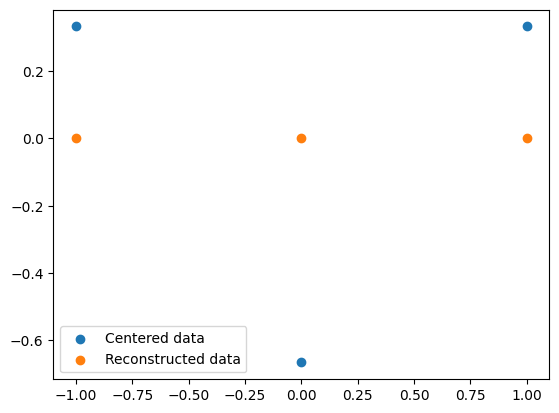

In [25]:
plt.scatter(data[:, 0], data[:, 1], label="Centered data")
reconstructed_data = np.column_stack([proj, np.zeros(proj.shape)])
plt.scatter(
    reconstructed_data[:, 0], reconstructed_data[:, 1], label="Reconstructed data"
)
plt.legend()

reconsutruction_error = np.linalg.norm(reconstructed_data - data)
print("The reconstruction error is: %1.2f" % reconsutruction_error)